In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
X.shape

(70000, 784)

In [6]:
some_digit = X[ 68898 ]
other_digit = X[62000]
some_digit_image = some_digit.reshape(28, 28)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

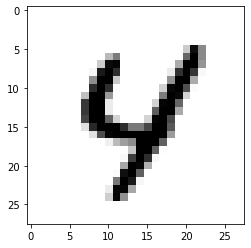

In [7]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, 
           interpolation = 'nearest')

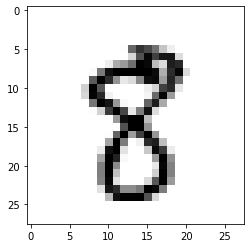

In [8]:
plt.imshow(X[46].reshape(28, 28), cmap = matplotlib.cm.binary, 
           interpolation = 'nearest')

In [9]:
y[46]

'8'

In [10]:
len(some_digit)

784

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [12]:
y_train_8 = (y_train == 8)
y_test_8 = (y_test == 8)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier(n_neighbors=3,weights= 'uniform')
KNN_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [14]:
KNN_clf.predict([some_digit])

array(['4'], dtype=object)

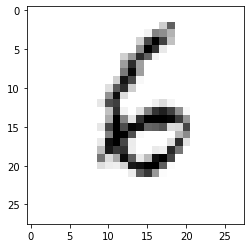

In [15]:
plt.imshow(X[62000].reshape(28, 28), cmap = matplotlib.cm.binary, 
           interpolation = 'nearest')

In [16]:
KNN_clf.predict([other_digit])

array(['6'], dtype=object)

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score

In [20]:
KNN_clf.score(X_test,y_test)

0.9705

In [25]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals = range(1, 30, 2)
accuracies = []
 
# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in range(1, 30, 2):
	# train the k-Nearest Neighbor classifier with the current value of `k`
	model = KNeighborsClassifier(n_neighbors=k)
	model.fit(X_train,y_train)
 
	# evaluate the model and update the accuracies list
	score = model.score(X_test, y_test)
	print("k=%d, accuracy=%.2f%%" % (k, score * 100))
	accuracies.append(score)
    
 #find the value of k that has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
	accuracies[i] * 100))

k=1, accuracy=96.91%
k=3, accuracy=97.05%
k=5, accuracy=96.88%
k=7, accuracy=96.94%
k=9, accuracy=96.59%
k=11, accuracy=96.68%
k=13, accuracy=96.53%
k=15, accuracy=96.33%
k=17, accuracy=96.30%
k=19, accuracy=96.32%
k=21, accuracy=96.30%
k=23, accuracy=96.19%
k=25, accuracy=96.09%
k=27, accuracy=96.04%
k=29, accuracy=95.93%
k=3 achieved highest accuracy of 97.05% on validation data
